In [27]:
import cv2
cv2.__version__
import numpy as np
from matplotlib import pyplot as plt
!pip install imutils
import imutils 

You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
bgr_img = cv2.imread("appletree.jpg")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=1600, height=1200, depth=3


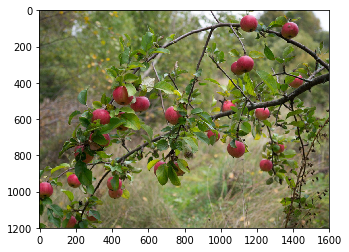

In [4]:
plt.imshow(image)

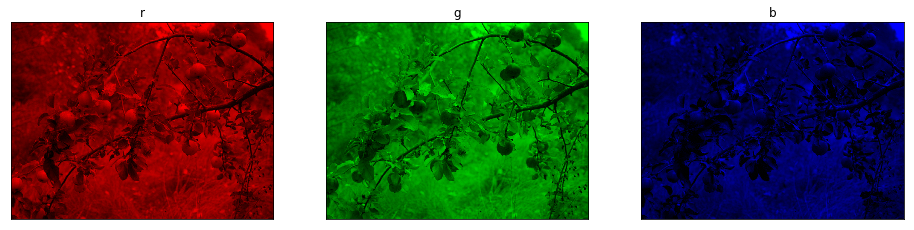

In [5]:
titles=['r','g','b']
plt.figure(figsize = (16,4))
for i in range(3):
    channel = np.zeros_like(image)
    channel[:,:,i] = image[:,:,i]
    plt.subplot(1,3,i+1), plt.imshow(channel)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [15]:
(R, G, B) = image[50,980]
print("R={}, G={}, B={}".format(R, G, B))

R=127, G=115, B=125


dtype('uint8')

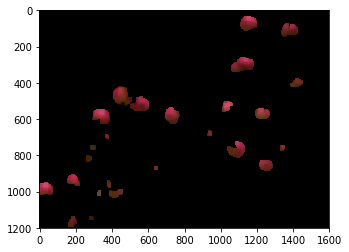

In [76]:
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
kernel = np.ones((19,19),np.uint8)  #
plt.imshow(image)
lowerBound = np.array([100,80,0])
upperBound = np.array([255,255,255])
mask = cv2.inRange(hsv,lowerBound,upperBound);
image_result = cv2.bitwise_and(image,image,mask=mask)
#plt.imshow(image_result)
img = cv2.morphologyEx(image_result,cv2.MORPH_OPEN,kernel)
plt.imshow(img,cmap='gray')
img.dtype
#mask = image_result.copy()
#mask = cv2.dilate(mask, None, iterations = 1)
#mask = cv2.erode(mask, None, iterations = 1)
#plt.imshow(mask, cmap = 'gray')

In [90]:
# count
# 1 find contours
img2 =cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img2.dtype
cnts = cv2.findContours(img2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
print(cnts[1])

[[[ 177 1136]]

 [[ 175 1138]]

 [[ 175 1140]]

 [[ 174 1141]]

 [[ 174 1149]]

 [[ 173 1150]]

 [[ 169 1150]]

 [[ 168 1151]]

 [[ 168 1155]]

 [[ 167 1156]]

 [[ 166 1156]]

 [[ 166 1157]]

 [[ 165 1158]]

 [[ 165 1159]]

 [[ 164 1160]]

 [[ 164 1161]]

 [[ 163 1162]]

 [[ 163 1164]]

 [[ 162 1165]]

 [[ 162 1167]]

 [[ 161 1168]]

 [[ 161 1171]]

 [[ 160 1172]]

 [[ 160 1174]]

 [[ 158 1176]]

 [[ 158 1195]]

 [[ 185 1195]]

 [[ 187 1193]]

 [[ 188 1193]]

 [[ 190 1191]]

 [[ 191 1191]]

 [[ 191 1190]]

 [[ 193 1188]]

 [[ 193 1186]]

 [[ 194 1185]]

 [[ 194 1184]]

 [[ 195 1183]]

 [[ 196 1183]]

 [[ 196 1182]]

 [[ 198 1180]]

 [[ 199 1180]]

 [[ 199 1179]]

 [[ 200 1178]]

 [[ 203 1178]]

 [[ 204 1177]]

 [[ 205 1177]]

 [[ 206 1176]]

 [[ 206 1157]]

 [[ 205 1156]]

 [[ 205 1149]]

 [[ 204 1148]]

 [[ 202 1148]]

 [[ 201 1147]]

 [[ 201 1144]]

 [[ 200 1144]]

 [[ 199 1143]]

 [[ 197 1143]]

 [[ 195 1141]]

 [[ 195 1136]]]


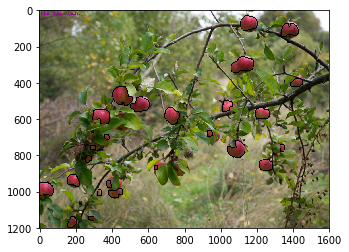

In [84]:
# 2 
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)


25


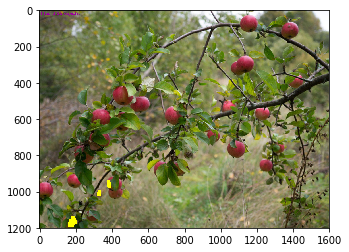

In [96]:

# 3
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)
print(len(cnts))

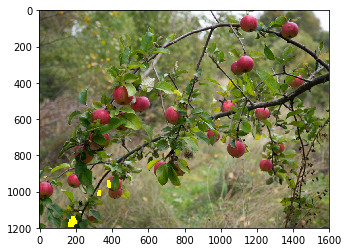

In [95]:
#C change color
cv2.drawContours(output, [cnts[5]], -1, (255, 255, 0), -1)
    
plt.imshow(output)

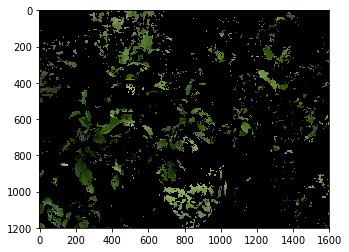

In [105]:
#D segment leaves
lowerBound = np.array([37,80,0])
upperBound = np.array([80,255,255])
mask = cv2.inRange(hsv,lowerBound,upperBound);
image_result = cv2.bitwise_and(image,image,mask=mask)
plt.imshow(image_result)